# Exploratory Data Analyst

In [2]:
import pandas as pd
from utils import preprocess_bike_movements
from utils import plot_bike_stations_on_map
from utils import analyze_bike_movements, plot_bike_speed_histogram


bike_movements_warsaw, warsaw_from_stations, warsaw_to_stations = preprocess_bike_movements(input_csv='app/data/bike_movements_warsaw.csv',
                                                 output_dir='data/bike_movements_warsaw.csv', city_prefix='warsaw')
warsaw_from_stations.columns = ["station_name", "latitude", "longitude"]
warsaw_to_stations.columns = ["station_name", "latitude", "longitude"]
warsaw_next_bike_stations=pd.concat([warsaw_to_stations, warsaw_to_stations])
warsaw_next_bike_stations=warsaw_next_bike_stations[~warsaw_next_bike_stations['station_name'].duplicated(keep='last')]
plot_bike_stations_on_map(warsaw_next_bike_stations, center=[52.2297, 21.0122], zoom_start=11)

In [3]:
stats = analyze_bike_movements(bike_movements_warsaw)
stats

{'total_trips': 184793,
 'unique_stations_from': 343,
 'unique_stations_to': 351,
 'mean_duration_min': np.float64(24.238713317062878),
 'median_duration_min': np.float64(13.366666666666667),
 'most_popular_route': array(['Metro Centrum Nauki Kopernik', 'Metro Centrum Nauki Kopernik'],
       dtype=object)}

<Axes: >

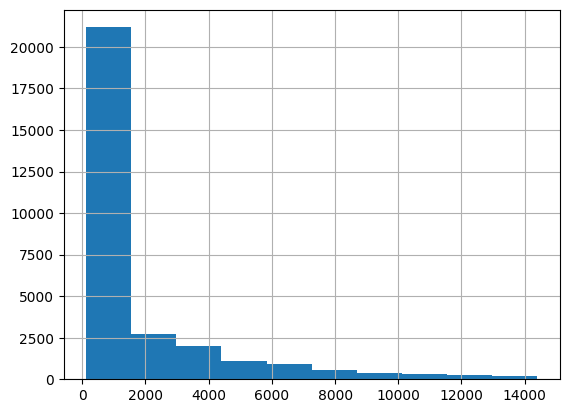

In [4]:
same_station_trips = bike_movements_warsaw[bike_movements_warsaw["from_station"] == bike_movements_warsaw["to_station"]]
same_station_trips["duration_seconds"].hist()

In [ ]:
import folium
import numpy as np

def plot_same_station_trip_frequency_on_map(
    trips_df, stations_df, city_center=None, zoom_start=12, red_speed=1.0, percent_mode=False
):
    freq = trips_df["from_station"].value_counts().reset_index()
    freq.columns = ["station_name", "count"]
    all_trips = stations_df.merge(
        trips_df["from_station"].value_counts().rename("all_count").reset_index().rename(columns={"index": "station_name"}),
        on="station_name", how="left"
    ).fillna(0)
    merged = stations_df.merge(freq, on="station_name", how="left").fillna(0)
    if percent_mode:
        merged = merged.merge(
            all_trips[["from_station", "all_count"]],
            on="station_name", how="left"
        ).fillna(0)
        merged["percent"] = merged["count"] / merged["all_count"].replace(0, np.nan)
        max_value = merged["percent"].max()
    else: 
        max_value = merged["count"].max()
    if city_center is None:
        center = [merged["latitude"].mean(), merged["longitude"].mean()]
    else:
        center = city_center
    m = folium.Map(location=center, zoom_start=zoom_start)
    for _, row in merged.iterrows():
        if percent_mode:
            value = row["percent"] if not np.isnan(row["percent"]) else 0
        else:
            value = row["count"]
        intensity = np.log1p(value * red_speed) / np.log1p(max_value * red_speed) if max_value > 0 else 0
        r = int(255 * intensity)
        g = int(255 * (1 - intensity))
        color = f"#{r:02x}{g:02x}00"
        popup_text = (
            f"{row['station_name']}: {row['count']} przejazdów"
            if not percent_mode
            else f"{row['station_name']}: {row['count']} przejazdów ({value:.1%})"
        )
        folium.CircleMarker(
            location=[row["latitude"], row["longitude"]],
            radius=6,
            color=color,
            fill=True,
            fill_opacity=0.8,
            popup=popup_text
        ).add_to(m)
    return m

plot_same_station_trip_frequency_on_map(
    same_station_trips,
    warsaw_next_bike_stations,
    city_center=[52.2297, 21.0122],
    zoom_start=11,
    red_speed=2,
    percent_mode=False
)

plot_same_station_trip_frequency_on_map(
    same_station_trips,
    warsaw_next_bike_stations,
    city_center=[52.2297, 21.0122],
    zoom_start=11,
    red_speed=2,
    percent_mode=True
)

KeyError: 'station_name'

In [6]:
same_station_trips

,bike_id,from_station,from_station_lat,from_station_lng,to_station,to_station_lat,to_station_lng,departure_time,arrival_time,duration_seconds,distance_meters
1,612804,Branickiego - Ledóchowskiej,52.155439,21.073689,Branickiego - Ledóchowskiej,52.155439,21.073689,2025-04-02 19:44:13,2025-04-02 19:46:16,123.0,0.0
2,613206,Rondo Wiatraczna,52.244564,21.083806,Rondo Wiatraczna,52.244564,21.083806,2025-04-02 19:44:13,2025-04-02 19:46:16,123.0,0.0
3,613345,Szaserów – Garwolińska,52.249684,21.092105,Szaserów – Garwolińska,52.249684,21.092105,2025-04-02 19:44:13,2025-04-02 19:46:16,123.0,0.0
4,613487,Żelazna - Chłodna,52.237314,20.988849,Żelazna - Chłodna,52.237314,20.988849,2025-04-02 19:45:14,2025-04-02 19:47:18,124.0,0.0
5,612403,Plac Na Rozdrożu,52.219962,21.025830,Plac Na Rozdrożu,52.219962,21.025830,2025-04-02 19:44:13,2025-04-02 19:47:18,185.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
184788,374162,AMB - Diagonal II,41.386799,2.116236,AMB - Diagonal II,41.386799,2.116236,2025-04-29 06:39:06,2025-04-29 09:57:40,11914.0,0.0
184789,374142,AMB - Riera Blanca Nord,41.371631,2.127232,AMB - Riera Blanca Nord,41.371631,2.127232,2025-04-29 08:15:20,2025-04-29 10:01:46,6386.0,0.0
184790,372710,AMB - METRO La Pau,41.423345,2.205672,AMB - METRO La Pau,41.423345,2.205672,2025-04-29 09:58:41,2025-04-29 10:03:48,307.0,0.0
184791,372710,AMB - METRO La Pau,41.423345,2.205672,AMB - METRO La Pau,41.423345,2.205672,2025-04-29 10:04:50,2025-04-29 10:23:15,1105.0,0.0


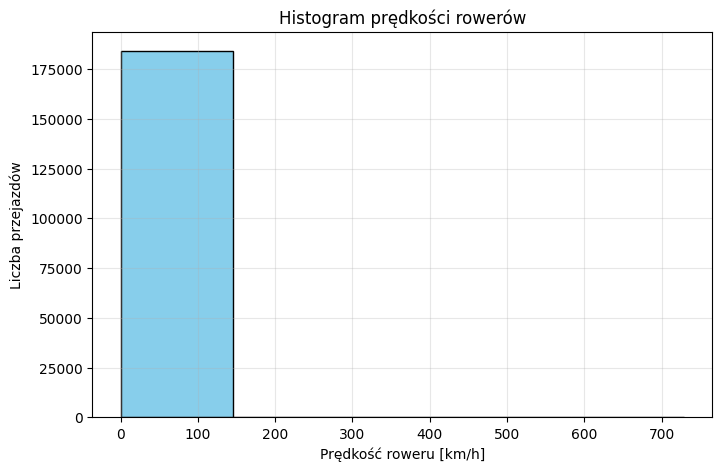

0         33.649793
1          0.000000
2          0.000000
3          0.000000
4          0.000000
            ...    
184788     0.000000
184789     0.000000
184790     0.000000
184791     0.000000
184792     0.000000
Length: 184793, dtype: float64

In [6]:
plot_bike_speed_histogram(bike_movements_warsaw, bins=5)

In [2]:
from datetime import datetime
import pandas as pd
from route_comparator import RouteComparator
from otp_client import OTPClient

PKP_GOLABKI = (52.208074, 20.864910)
PLAC_POLITECHNIKI = (52.219916, 21.011682)
when = datetime.now().astimezone().replace(hour=12, minute=0, second=0, microsecond=0)

bike_movements = pd.read_csv("bike_movements_warsaw.csv")
from_stations = pd.read_csv("from_stations_bike_movements_warsaw.csv")
to_stations = pd.read_csv("to_stations_bike_movements_warsaw.csv")

otp = OTPClient("http://localhost:8080/otp/gtfs/v1")

comparator = RouteComparator(
    otp_client=otp,
    bike_df=bike_movements,
    from_stations=from_stations,
    to_stations=to_stations,
    radius_km=1.5
)

mapa = comparator.compare_otp_vs_estimated_bike(
    start_coord=PKP_GOLABKI,
    end_coord=PLAC_POLITECHNIKI,
    when=when
)
mapa.save("otp_vs_bike_estimate.html")
print("✅ Zapisano mapę: otp_vs_bike_estimate.html")
mapa

🚌 OTP: 51 min
🟢 Najbliższa stacja startowa: EkoPark - Warszawska
🔴 Najbliższa stacja końcowa: Marszałkowska - Al. Jerozolimskie
🚶 Dojście do roweru: 9 min
🚶 Z roweru do celu: 11 min
🚲 Rower: 39.6 min (9.90 km)
🧮 Łącznie: 60.4 min
✅ Zapisano mapę: otp_vs_bike_estimate.html
